# Telco Churn Problem

**Define these as part of group exercise**

- Why (Business Problem)
- What (Analytica Problem)

## Churn

This is a sample dataset for a Telo aiming predicting customer behavior to retain them. The key target of the analysis is the churn feature - customers that left the service with the last month. Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

Data Columns

- Customer Account Information
  - `CustomerID`: Unique ID for the customer *(unique String)*?
  - `Churn`: Customers who left within the last month *(Yes or No)*?
  - `Tenure`: How long they’ve been a customer *(In months, Integer)*?
  - `Contract`: What type of contract do they have *(Month-to-month, One year, Two year)*?
  - `PaymentMethod`: What payment method is used by the customer *(Electronic check, Mailed check, Bank transfer, or Credit card)*?
  - `PaperlessBilling`: Whether the customer has subscribed to paperless billing *(Yes or No)*?
  - `MonthlyCharges`: What was the monthly charges for the customer (Amount, Float)?
  - `TotalCharges`: What were the total charges for the customer (Amount, Float)?
- Customer Demographics 
  - `Gender`: What is the gender of the customer *(Male or Female)*?
  - `SeniorCitizen`: Whether the customer is a Senior Citizen or not *(0 or 1)*?
  - `Partner`: Whether the customer has a partner *(Yes or No)*?
  - `Dependents`: Whether the customer has any dependents *(Yes or No)*?
- Customer Signed Up Service Status
  - `PhoneService`: Signed up for Phone Service *(Yes or No)*?
  - `MultipleLines`: Signed up for Multiple Lines *(Yes or No or No Phone Service)*?
  - `InternetService`: Signed up for Internet Service *(DSL or Fiber optic or No)*?
  - `OnlineSecurity`: Signed up for Online Security *(Yes or No or No internet service)*?
  - `OnlineBackup`: Signed up for Online Backup *(Yes or No or No internet service)*?
  - `DeviceProtection`: Signed up for Device Protection plan *(Yes or No or No internet service)*?
  - `TechSupport`: Signed up for Tech Support *(Yes or No or No internet service)*?
  - `StreamingTV`: Signed up for Streaming TV *(Yes or No or No internet service)*?
  - `StreamingMovies`: Signed up for Streaming Movies *(Yes or No or No internet service)*?

Metadata
- Filename: `churn.csv`
- Observations `(n)` : 7043
- Dimensions `(p)`   : 21

Source: Kaggle Telcom Customer Churn @ https://www.kaggle.com/blastchar/telco-customer-churn



In [1]:
import numpy as np
import pandas as pd
import altair as alt

In [3]:
df = pd.read_csv("../data/churn.csv")

In [4]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Make 1D & 2D visualisations for these features:

- `Churn`
- `Tenure`
- `Contract`
- `MonthlyCharges`
- `PaymentMethod`

## Chart Vocabulary

https://gramener.github.io/visual-vocabulary-vega/#/Magnitude/
    
http://ft.com/vocabulary

## Distribution

### Histogram

In [10]:
alt.data_transformers.enable("json")

DataTransformerRegistry.enable('json')

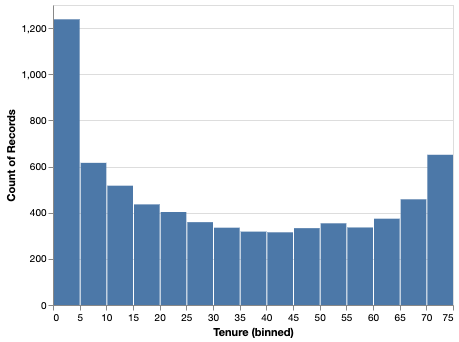

In [11]:
alt.Chart(df).mark_bar().encode(
    alt.X("Tenure:Q", bin=alt.BinParams(maxbins=20)),
    alt.Y("count()")
)

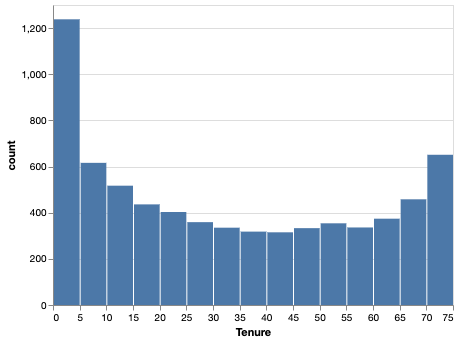

In [12]:
alt.Chart(df).mark_bar().encode(
    alt.X("Tenure:Q", bin=alt.BinParams(maxbins=20), title="Tenure"),
    alt.Y("count()", title="count")
)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
bin_tenure = pd.cut(df.Tenure, bins=20)

In [26]:
bin_tenure

0       (-0.072, 3.6]
1        (32.4, 36.0]
2       (-0.072, 3.6]
3        (43.2, 46.8]
4       (-0.072, 3.6]
            ...      
7038     (21.6, 25.2]
7039     (68.4, 72.0]
7040     (10.8, 14.4]
7041       (3.6, 7.2]
7042     (64.8, 68.4]
Name: Tenure, Length: 7043, dtype: category
Categories (20, interval[float64]): [(-0.072, 3.6] < (3.6, 7.2] < (7.2, 10.8] < (10.8, 14.4] ... (57.6, 61.2] < (61.2, 64.8] < (64.8, 68.4] < (68.4, 72.0]]

### Frequency Polygon

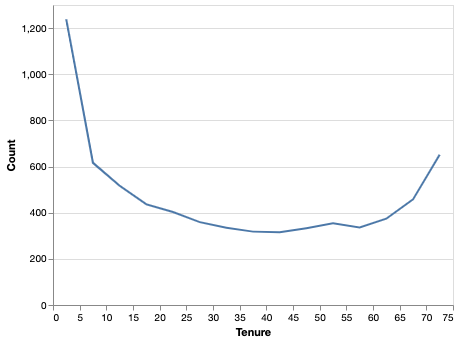

In [27]:
alt.Chart(df).mark_line().encode(
    alt.X("Tenure:Q", bin=alt.BinParams(maxbins=20), title="Tenure"),
    alt.Y("count()", title="Count")
)

### Boxplot

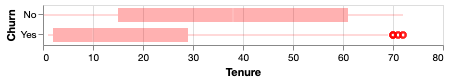

In [31]:
alt.Chart(df).mark_boxplot(opacity=0.3, color='red').encode(
    alt.X("Tenure:Q", title="Tenure"),
    alt.Y("Churn:N", title="Churn")
)

In [32]:
df[df.Churn=="Yes"]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [34]:
left = alt.Chart(df[df.Churn=="Yes"]).mark_bar(color="red", opacity=0.3).encode(
    alt.Y("Tenure:Q", bin=alt.BinParams(maxbins=20),
          axis=alt.Axis(orient="right")
         ),
    alt.X("count()", title="Count", sort=alt.SortOrder("descending"))
)

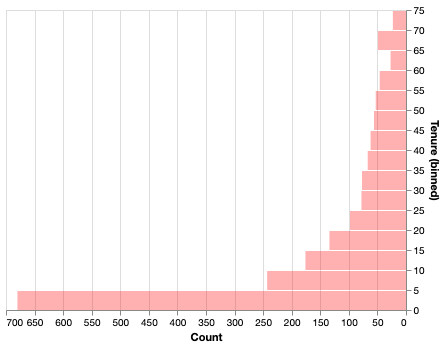

In [35]:
left

In [36]:
right = alt.Chart(df[df.Churn=="No"]).mark_bar(color="blue", opacity=0.3).encode(
    alt.Y("Tenure:Q", title=None, bin=alt.BinParams(maxbins=20)),
    alt.X("count()", title="Count")
)

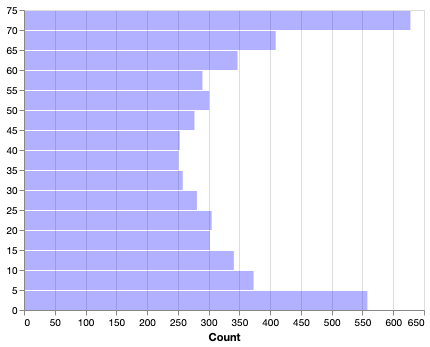

In [37]:
right

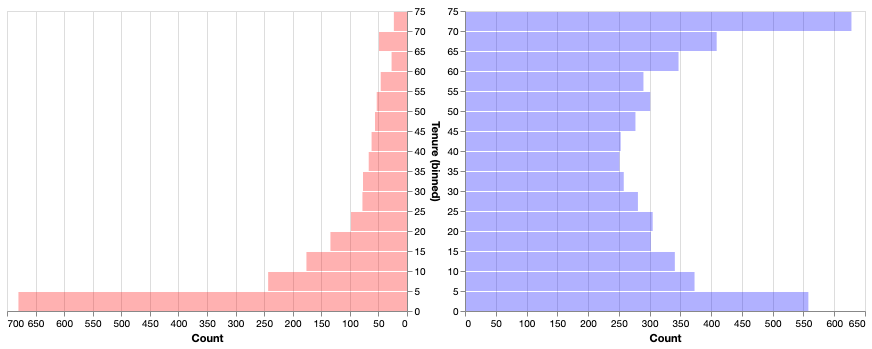

In [38]:
alt.concat(left, right, spacing=3)

In [40]:
right = alt.Chart(df[df.Churn=="No"]).mark_bar(color="blue", opacity=0.3).encode(
    alt.Y("Tenure:Q", title=None, bin=alt.BinParams(maxbins=20), axis=None),
    alt.X("count()", title="Count")
)

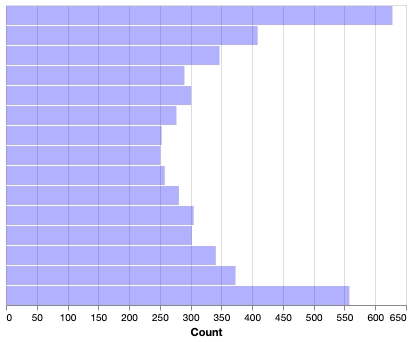

In [41]:
right